In [2]:
%load_ext autoreload
%autoreload 2

import requests
import pandas as pd
from dotenv import load_dotenv
import geopandas as gpd
import os
from nycschools import schools, geo, ui, config, dataloader, snapshot
from nycschools.dataloader import load
from bs4 import BeautifulSoup
import numpy as np
import ssl


# Temporarily disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

# # read SOCRATA_APP_TOKEN from .envpytho file
# load_dotenv()
# token = os.getenv("SOCRATA_APP_TOKEN")
# # os.environ['NYC_SCHOOLS_DATA_DIR'] = '/home/mxc/Projects/school-data-portal/school-data'
# os.getenv("NYC_SCHOOLS_DATA_DIR")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = gpd.read_file("~/Downloads/loc.zip")
df

ATS Building_C Location_C                            Name  \
0     01M015       M015       M015       P.S. 015 Roberto Clemente   
1     01M020       M020       M020            P.S. 020 Anna Silver   
2     01M034       M034       M034  P.S. 034 Franklin D. Roosevelt   
3     01M063       M063       M063       The STAR Academy - P.S.63   
4     01M064       M064       M064           P.S. 064 Robert Simon   
...      ...        ...        ...                             ...   
1945  88X966       X988       X966  ALC - BRONX EDUCATIONAL CENTER   
1946  88X994       X358       X994           ALC - Crotona Academy   
1947  88X995       X896       X995         ALC - Rose Hill Academy   
1948  88X996       X450       X996          ALC - Stevenson Campus   
1949  93M359       M882       M359                   Dream Program   

      Geographic   Latitude  Longitude                          geometry  
0              1  40.722075 -73.978747  POINT (-8235276.446 4971433.816)  
1              1  40.721305 -73.986312  POINT (-8236118.578 4971320.718)  
2              1  40.726008 -73.975058  POINT (-8234865.788 4972011.521)  
3              1  40.724440 -73.986214  POINT (-8236107.668 4971781.199)  
4              1  40.723130 -73.981597  POINT (-8235593.706 4971588.778)  
...          ...        ...        ...                               ...  
1945           8  40.816494 -73.890278  POINT (-8225428.122 4985312.134)  
1946          12  40.829306 -73.892243  POINT (-8225646.864 4987196.846)  
1947          10  40.857248 -73.903165  POINT (-8226862.696 4991308.524)  
1948           8  40.821218 -73.855930  POINT (-8221604.520 4986007.017)  
1949           2  40.747398 -73.992832  POINT (-8236844.381 4975154.021)  

[1950 rows x 8 columns]

In [5]:
df.explore()

In [90]:
df = snapshot.load_snapshots()
display(df.columns)
rename = {
    "abbr_school_type": "school_type",
    "district": "geo_district",
    "x_coordinate": "x",
    "y_coordinate": "y",
}
# calc district
# calc real percentages ()

df.cols

Index(['dbn', 'school_name', 'school_type', 'address',
       'all_es_admissionsmethods', 'all_ms_admissionsmethods',
       'attendance_rate', 'authorizer_website', 'ay', 'champs_sports_boys',
       'champs_sports_coed', 'champs_sports_girls', 'city_state_zip',
       'co_located', 'dates_of_review', 'district', 'dual_lang', 'ell_n',
       'ell_pct', 'total_enrollment', 'es_directory', 'amerindian_n',
       'amerindian_pct', 'asian_n', 'asian_pct', 'black_n', 'black_pct',
       'hispanic_n', 'hispanic_pct', 'pacific_n', 'pacific_pct', 'white_n',
       'white_pct', 'race_other_pct', 'extracurricularactivities_ms',
       'formal_authorizer', 'gender_female_n', 'gender_female_pct',
       'gender_male_n', 'gender_male_pct', 'gender_x_n', 'gender_x_pct',
       'grades_text', 'high_opt_out_sch', 'iep_n', 'iep_pct', 'overview_ms',
       'online_admissions_link_ms', 'panorama_id', 'principal_name',
       'principal_phone_number', 'principal_years', 'quality_review_url',
       'qual

AttributeError: 'DataFrame' object has no attribute 'cols'

In [58]:
url = "https://tools.nycenet.edu/vue-assets/static/data/sqs/2017/school_info.csv"
url = "https://tools.nycenet.edu/api/v1/data/school/app/snapshot/all/2020/03M415/EMS"
ca = "/etc/ssl/certs/ca-certificates.crt"
import pycurl
from io import BytesIO

buffer = BytesIO()
c = pycurl.Curl()
c.setopt(c.URL, url)
c.setopt(c.WRITEDATA, buffer)
c.setopt(c.CAINFO, ca)
c.perform()
c.close()

body = buffer.getvalue()
print(body.decode('iso-8859-1'))

[{"dbn":"03M415","report_type":"EMS","value":"MS","varname":"abbr_school_type","year":2020},{"dbn":"03M415","report_type":"EMS","value":"215 West 114 Street","varname":"address","year":2020},{"dbn":"03M415","report_type":"EMS","value":"Screened","varname":"all_ms_admissionsmethods","year":2020},{"dbn":"03M415","report_type":"EMS","value":"99%","varname":"attendance_rate","year":2020},{"dbn":"03M415","report_type":"EMS","value":null,"varname":"authorizer_website","year":2020},{"dbn":"03M415","report_type":"EMS","value":"94%","varname":"cavg_attendance_k8_all","year":2020},{"dbn":"03M415","report_type":"EMS","value":"92%","varname":"cavg_hs_9gr_credits_all","year":2020},{"dbn":"03M415","report_type":"EMS","value":"89%","varname":"cavg_interaction_k8_all","year":2020},{"dbn":"03M415","report_type":"EMS","value":"97%","varname":"cavg_pct_core_all_subj","year":2020},{"dbn":"03M415","report_type":"EMS","value":"N/A","varname":"cavg_prof_pct_ela_all","year":2020},{"dbn":"03M415","report_type"

In [59]:
import requests

url = "https://tools.nycenet.edu/api/v1/data/school/app/snapshot/all/2020/03M415/EMS"
ca_bundle_path = "/etc/ssl/certs/ca-certificates.crt"

response = requests.get(url, verify=ca_bundle_path)
print(response.text)

SSLError: HTTPSConnectionPool(host='tools.nycenet.edu', port=443): Max retries exceeded with url: /api/v1/data/school/app/snapshot/all/2020/03M415/EMS (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1000)')))

In [34]:
demos =schools.load_school_demographics()
df = snapshot.get_snapshot_schools()


End year: 2024
https://tools.nycenet.edu/vue-assets/static/data/sqs/2016/school_info.csv
There was a server error, possibly a 404 or similar.
https://tools.nycenet.edu/vue-assets/static/data/sqs/2016/school_info_pk.csv
There was a server error, possibly a 404 or similar.
https://tools.nycenet.edu/vue-assets/static/data/sqs/2017/school_info.csv
https://tools.nycenet.edu/vue-assets/static/data/sqs/2017/school_info_pk.csv
https://tools.nycenet.edu/vue-assets/static/data/sqs/2018/school_info.csv
https://tools.nycenet.edu/vue-assets/static/data/sqs/2018/school_info_pk.csv
https://tools.nycenet.edu/vue-assets/static/data/sqs/2019/school_info.csv
https://tools.nycenet.edu/vue-assets/static/data/sqs/2019/school_info_pk.csv
https://tools.nycenet.edu/vue-assets/static/data/sqs/2020/school_info.csv
https://tools.nycenet.edu/vue-assets/static/data/sqs/2020/school_info_pk.csv
https://tools.nycenet.edu/vue-assets/static/data/sqs/2021/school_info.csv
https://tools.nycenet.edu/vue-assets/static/data/s

In [12]:
a = set(df.dbn)
b = set(demos.dbn)
# these schools are not in the demos snapshot
df[(~df.dbn.isin(b)) & (df.report_type != "PK")]

dbn report_type  school_type                           school  year
194  03M610         EMS       Middle  Young Women's Leadership School  2023
195  03M610          HS  High School  Young Women's Leadership School  2023

In [32]:
df["ay"] = df.year -1
demos = demos[demos.ay.isin(df.ay.unique())]
a = set(df.dbn)
b = set(demos.dbn)



# dbn in b but not a
# len(b - a)
# demos[demos.dbn.isin(b - a)]
merged = demos.merge(df, on=["dbn", "ay"], how="inner")
missing = demos[~demos.dbn.isin(merged.dbn)]
missing.district.value_counts()
missing_demo = df[~df.dbn.isin(merged.dbn)]
missing_demo[missing_demo.report_type != "PK"]

dbn report_type  school_type                              school  \
23    01M509          HS  High School             Marta Valle High School   
322   07X151         EMS       Middle               J.H.S. 151 Lou Gehrig   
407   08X559          HS  High School  School for Tourism and Hospitality   
720   13K499          HS  High School         ACORN Community High School   
799   15K418         EMS   Elementary               The Children's School   
1672  84K359          HS  High School              The Uft Charter School   
1883  84X256         EMS   Elementary     Heketi Community Charter School   
322   07X151         EMS       Middle               J.H.S. 151 Lou Gehrig   
408   08X559          HS  High School  School for Tourism and Hospitality   
797   15K418         EMS   Elementary               The Children's School   
795   15K418         EMS   Elementary               The Children's School   
194   03M610         EMS       Middle     Young Women's Leadership School   
195   03M610          HS  High School     Young Women's Leadership School   
794   15K418         EMS   Elementary               The Children's School   

      year    ay  
23    2020  2019  
322   2020  2019  
407   2020  2019  
720   2020  2019  
799   2020  2019  
1672  2020  2019  
1883  2020  2019  
322   2021  2020  
408   2021  2020  
797   2021  2020  
795   2022  2021  
194   2023  2022  
195   2023  2022  
794   2023  2022

In [57]:
from requests import Session
session = Session()
errors = []
s = df[df.report_type == "EMS"].iloc[100]
display(s)


# x = snapshot.scrape_school(s.dbn, s.url, s.year - 1, session, errors)
s.url

dbn                                                       03M415
report_type                                                  EMS
school_type                                               Middle
school         Wadleigh Secondary School for the Performing &...
year                                                        2020
url            https://tools.nycenet.edu/api/v1/data/school/a...
Name: 185, dtype: object

'https://tools.nycenet.edu/api/v1/data/school/app/snapshot/all/2020/03M415/EMS'

In [5]:
census = load("census.geojson")
demos = schools.load_school_demographics()
school_loc = geo.load_school_locations()
districts = geo.load_districts()
feet = geo.load_school_footprints()

In [35]:
census = census[census.year == census.year.max()]
display(census.columns)
colors = {
    "asian": "yellow",
    "black": "blue",
    "indian": "pink",
    "latino": "green",
    "mixed": "red",
    "other": "grey",
    "pacific": "orange",
    "white": "purple",
}
cols = ['asian', 'black', 'indian', 'latino', 'mixed', 'other', 'pacific', 'white']
pop = census.melt(id_vars=["geoid", "geometry"], value_vars=colors.keys(), var_name="group", value_name="n")

census[census.total_pop > 0].total_pop.describe()


Index(['geoid', 'name', 'median_inc', 'total_pop', 'asian', 'black', 'indian',
       'latino', 'mixed', 'other', 'pacific', 'white', 'state', 'county',
       'tract', 'year', 'geometry'],
      dtype='object')

count     2242.000000
mean      3845.881802
std       1967.840256
min          3.000000
25%       2447.250000
50%       3529.000000
75%       4925.250000
max      15945.000000
Name: total_pop, dtype: float64

In [39]:
import folium
import warnings
warnings.filterwarnings('ignore')
# get the mean lat and long of census

center = [census.geometry.centroid.y.mean(), census.geometry.centroid.x.mean()]
m = folium.Map(location=center, zoom_start=11, tiles="CartoDB positron")
borders = lambda x: {'color': 'black', 'weight': 1, 'fillOpacity': 0, 'opacity': .8, }

folium.GeoJson(
    data=census[["geometry", "geoid"]].to_json(),
    interactive=False,
    style_function=borders
).add_to(m)
points = ui.dot_density(pop,count_col='n')
points

In [9]:

loc = geo.get_locations()

loc[loc.open_year.isnull()][["dbn","open_year"]]

points = geo.get_points()
# points
loc.columns, points.columns



(Index(['dbn', 'administrative_district_code', 'administrative_district_name',
        'beds', 'borough_block_lot', 'census_tract', 'community_district',
        'community_school_sup_name', 'council_district', 'fax_number',
        'fiscal_year', 'geographical_district_code', 'grades_final_text',
        'grades_text', 'highschool_network', 'highschool_network_location',
        'highschool_network_name', 'latitude', 'location_category_description',
        'location_code', 'location_name', 'location_type_description',
        'longitude', 'managed_by_name', 'nta', 'nta_name', 'open_year',
        'police_precinct', 'primary_building_code', 'principal_name',
        'principal_phone_number', 'principal_title', 'state_code',
        'status_descriptions'],
       dtype='object'),
 Index(['dbn', 'zip', 'geo_district', 'district', 'x', 'y', 'bbl', 'geometry'], dtype='object'))

In [6]:
a = schools.get_demo_2006()
b = schools.get_demo_2013()
c = schools.get_demo_2016()
d = schools.get_demo_2022()

In [8]:
print(a.poverty_pct.mean())
print(b.poverty_pct.mean())
print(c.poverty_pct.mean())
print(d.poverty_pct.mean())

schools.save_demographics()

0.7051295285359802
0.7560211218352217
0.7328562639821028
0.7727012726660073


dbn          beds  district  geo_district       boro  \
0     01M015  310100010015         1             1  Manhattan   
1     01M015  310100010015         1             1  Manhattan   
2     01M015  310100010015         1             1  Manhattan   
3     01M015  310100010015         1             1  Manhattan   
4     01M015  310100010015         1             1  Manhattan   
...      ...           ...       ...           ...        ...   
9327  84X730  320800860846        84             8      Bronx   
9328  84X730  320800860846        84             8      Bronx   
9329  84X730  320800860846        84             8      Bronx   
9330  84X730  320800860846        84             8      Bronx   
9331  84X730  320800860846        84             8      Bronx   

                            school_name short_name    ay     year school_type  \
0             P.S. 015 ROBERTO CLEMENTE      PS 15  2005  2005-06          PS   
1             P.S. 015 ROBERTO CLEMENTE      PS 15  2006  2006-07          PS   
2             P.S. 015 ROBERTO CLEMENTE      PS 15  2007  2007-08          PS   
3             P.S. 015 ROBERTO CLEMENTE      PS 15  2008  2008-09          PS   
4             P.S. 015 ROBERTO CLEMENTE      PS 15  2009  2009-10          PS   
...                                 ...        ...   ...      ...         ...   
9327  Bronx Charter School for the Arts     PS 730  2018  2018-19     charter   
9328  Bronx Charter School for the Arts     MS 730  2019  2019-20     charter   
9329  Bronx Charter School for the Arts     MS 730  2020  2020-21     charter   
9330  Bronx Charter School for the Arts     MS 730  2021  2021-22     charter   
9331  Bronx Charter School for the Arts     MS 730  2022  2022-23     charter   

      ...  missing_race_ethnicity_data_pct  swd_n   swd_pct  ell_n   ell_pct  \
0     ...                         0.000000   57.0  0.203000   36.0  0.128000   
1     ...                         0.000000   55.0  0.226000   38.0  0.156000   
2     ...                         0.000000   60.0  0.230000   52.0  0.199000   
3     ...                         0.000000   62.0  0.246000   48.0  0.190000   
4     ...                         0.000000   46.0  0.221000   40.0  0.192000   
...   ...                              ...    ...       ...    ...       ...   
9327  ...                         0.000000  103.0  0.239535   71.0  0.165116   
9328  ...                         0.000000  117.0  0.223709   69.0  0.131931   
9329  ...                         0.001597  152.0  0.242812   78.0  0.124601   
9330  ...                         0.003344  135.0  0.225753   79.0  0.132107   
9331  ...                         0.003384  132.0  0.223350   74.0  0.125212   

      poverty_n  poverty_pct       eni                         clean_name  \
0           251     0.894000  0.000000                   roberto clemente   
1           217     0.894000  0.000000                   roberto clemente   
2           233     0.894000  0.000000                   roberto clemente   
3           225     0.894000  0.000000                   roberto clemente   
4           200     0.965000  0.000000                   roberto clemente   
...         ...          ...       ...                                ...   
9327        363     0.844186  0.887860  bronx charter school for the arts   
9328        453     0.866157  0.892342  bronx charter school for the arts   
9329        547     0.873802  0.888728  bronx charter school for the arts   
9330        540     0.903010  0.903701  bronx charter school for the arts   
9331        509     0.861252  0.907175  bronx charter school for the arts   

        zip  
0     10009  
1     10009  
2     10009  
3     10009  
4     10009  
...     ...  
9327  10474  
9328  10474  
9329  10474  
9330  10474  
9331  10474  

[28344 rows x 52 columns]

In [ ]:

df = schools.save_demographics()
df.ay.unique()

In [7]:
df = schools.load_school_demographics()
a = len(df)
b = len(df[["dbn","ay"]].drop_duplicates())
a, b

(28344, 28344)

In [25]:
from nycschools.schools import get_demographics
df13_raw = pd.read_csv(config.urls["demographics"].data_urls["2013"])
df16 = pd.read_csv(config.urls["demographics"].data_urls["2016"])

display(df13_raw.columns)
display(df16.columns)

Index(['dbn', 'school_name', 'year', 'total_enrollment',
       'grade_pk_half_day_full_day', 'grade_k', 'grade_1', 'grade_2',
       'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'female_1', 'female_2',
       'male_1', 'male_2', 'asian_1', 'asian_2', 'black_1', 'black_2',
       'hispanic_1', 'hispanic_2',
       'multiple_race_categories_not_represented_1',
       'multiple_race_categories_not_represented_2', 'white_1', 'white_2',
       'students_with_disabilities_1', 'students_with_disabilities_2',
       'english_language_learners_1', 'english_language_learners_2',
       'poverty_1', 'poverty_2', 'economic_need_index'],
      dtype='object')

Index(['dbn', 'school_name', 'year', 'total_enrollment',
       'grade_3k_pk_half_day_full', 'grade_k', 'grade_1', 'grade_2', 'grade_3',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'female', 'female_1', 'male',
       'male_1', 'asian', 'asian_1', 'black', 'black_1', 'hispanic',
       'hispanic_1', 'multi_racial', 'multi_racial_1', 'native_american',
       'native_american_1', 'white', 'white_1', 'missing_race_ethnicity_data',
       'missing_race_ethnicity_data_1', 'students_with_disabilities',
       'students_with_disabilities_1', 'english_language_learners',
       'english_language_learners_1', 'poverty', 'poverty_1',
       'economic_need_index'],
      dtype='object')

In [26]:

def map_col(c):
    if c.endswith("_1") and not c.startswith("grade"):
        return c.replace("_1", "")
    if c.endswith("_2") and not c.startswith("grade"):
        return c.replace("_2", "_1")
    if c == "grade_pk_half_day_full_day":
        return "grade_3k_pk_half_day_full"
    return c


df13 = df13_raw.rename(columns=map_col)
df13["multi_racial"] = df13['multiple_race_categories_not_represented']
df13["multi_racial_1"] = df13['multiple_race_categories_not_represented_1']
df13['missing_race_ethnicity_data'] = 0
df13['missing_race_ethnicity_data_1'] = 0
df13['native_american'] = 0
df13['native_american_1'] = 0

df13.rename(columns={"grade_3k_pk_half_day_full": "grade_pk"}, inplace=True)
df13["neither_female_nor_male"] = 0
df13["neither_female_nor_male_pct"] = 0
df13 = get_demographics(df13)

In [33]:



df13.ay.unique(), df.ay.unique()

(array([2013, 2014, 2015, 2016, 2017]),
 array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2016, 2018, 2019, 2020,
        2021, 2022]))

In [14]:
df06 = pd.read_csv(config.urls["demographics"].data_urls["2006"])
df06.schoolyear

0        20052006
1        20062007
2        20072008
3        20082009
4        20092010
           ...   
10070    20072008
10071    20082009
10072    20092010
10073    20102011
10074    20112012
Name: schoolyear, Length: 10075, dtype: int64

In [ ]:

# print("2006 years: ", demo["schoolyear"].unique())
df13.year.unique()
df13.rename(columns={"grade_3k_pk_half_day_full": "grade_pk"}, inplace=True)
df13["neither_female_nor_male"] = 0
df13["neither_female_nor_male_pct"] = 0
get_demographics(df13)

In [46]:
def map_col(c):
    if c.startswith("grade"):
        return f"grade_{c[len('grade'):]}"
    if c == "sped_percent":
        return "swd_pct"
    if c == "sped_num":
        return "swd_n"
    if c == "prek":
        return "grade_pk"
    if c == "k":
        return f"grade_{c}"
    if c.endswith("_num"):
        return c.replace("_num", "_n")
    if c.endswith("_percent"):
        return c.replace("_percent", "_pct")
    if c.endswith("_per"):
        return c.replace("_per", "_pct")
    if c == "name":
        return "school_name"
    return c

d2 = demo.rename(columns=map_col)

# parse AY and year
d2["ay"] = d2.schoolyear // 10000
d2["year"] = d2.ay.apply(lambda x: f"{x}-{((x % 10) + 1):02}")

# make percentages real
def check(n):
    if pd.isna(n) or pd.isnull(n):
        return 0
    try:
        float(n)
        return float(n)
    except:
        return 0


# fill missing data
d2.fl_pct = d2.fl_pct.apply(check)
d2.frl_pct = d2.frl_pct.apply(check)


# fix the grades and percentages
for c in d2.columns:
    if c.startswith("grade_"):
        d2[c] = pd.to_numeric(df[c], downcast='integer', errors='coerce')
    if c.endswith("_pct"):
        d2[c] = np.round(d2[c] / 100, 4)


d2["poverty_pct"] = np.maximum(d2.fl_pct, d2.frl_pct)
d2["poverty_n"] = np.floor(d2.poverty_pct * d2.total_enrollment).astype(int)


d2["district"] = d2["dbn"].apply(lambda dbn: int(dbn[:2]))

boros = {"K": "Brooklyn", "X": "Bronx", "M": "Manhattan",
         "Q": "Queens", "R": "Staten Island"}
d2["boro"] = d2["dbn"].apply(lambda dbn: boros[dbn[2]])
d2["school_num"] = d2.dbn.apply(lambda dbn: int(dbn[3:]))
d2["charter"] = 0


# figure out what grades they teach
d2["pk"] = d2["grade_pk"] > 0
d2["elementary"] = d2["grade_2"] > 0
d2["middle"] = d2["grade_7"] > 0
d2["hs"] = d2["grade_10"] > 0

# make it easier to look up schools
d2["school_type"] = d2.apply(schools.school_type, axis=1)
d2["clean_name"] = d2.apply(lambda row: schools.clean_name(row.school_name), axis=1)
d2["short_name"] = d2.apply(schools.short_name, axis=1)


d2['eni'] = 0
d2['missing_race_ethnicity_data_n'] = 0
d2['missing_race_ethnicity_data_pct'] = 0
d2['multi_racial_n'] = 0
d2['multi_racial_pct'] = 0
d2['native_american_n'] = 0
d2['native_american_pct'] = 0

set(df.columns) - set(d2.columns)
d2 = schools.join_loc_data(d2)
d2[schools.demo.default_cols]

dbn          beds  district  geo_district       boro  \
0      01M015  310100010015         1             1  Manhattan   
1      01M015  310100010015         1             1  Manhattan   
2      01M015  310100010015         1             1  Manhattan   
3      01M015  310100010015         1             1  Manhattan   
4      01M015  310100010015         1             1  Manhattan   
...       ...           ...       ...           ...        ...   
10070  32K564  333200010564        32            32   Brooklyn   
10071  32K564  333200010564        32            32   Brooklyn   
10072  32K564  333200010564        32            32   Brooklyn   
10073  32K564  333200010564        32            32   Brooklyn   
10074  32K564  333200010564        32            32   Brooklyn   

                                            school_name short_name    ay  \
0                             P.S. 015 ROBERTO CLEMENTE      PS 15  2005   
1                             P.S. 015 ROBERTO CLEMENTE      PS 15  2006   
2                             P.S. 015 ROBERTO CLEMENTE      PS 15  2007   
3                             P.S. 015 ROBERTO CLEMENTE      PS 15  2008   
4                             P.S. 015 ROBERTO CLEMENTE      PS 15  2009   
...                                                 ...        ...   ...   
10070                    BUSHWICK COMMUNITY HIGH SCHOOL     PS 564  2007   
10071                    BUSHWICK COMMUNITY HIGH SCHOOL     PS 564  2008   
10072                    BUSHWICK COMMUNITY HIGH SCHOOL     MS 564  2009   
10073                    BUSHWICK COMMUNITY HIGH SCHOOL     MS 564  2010   
10074  BUSHWICK COMMUNITY HIGH SCHOOL                       MS 564  2011   

          year school_type  ...  missing_race_ethnicity_data_pct  swd_n  \
0      2005-06          PS  ...                                0   57.0   
1      2006-07          PS  ...                                0   55.0   
2      2007-08          PS  ...                                0   60.0   
3      2008-09          MS  ...                                0   62.0   
4      2009-10          PS  ...                                0   46.0   
...        ...         ...  ...                              ...    ...   
10070  2007-08          PS  ...                                0   21.0   
10071  2008-09          PS  ...                                0   28.0   
10072  2009-10          MS  ...                                0   35.0   
10073  2010-01          MS  ...                                0   37.0   
10074  2011-02          MS  ...                                0   36.0   

       swd_pct  ell_n  ell_pct  poverty_n  poverty_pct  eni  \
0        0.203   36.0    0.128        251        0.894    0   
1        0.226   38.0    0.156        217        0.894    0   
2        0.230   52.0    0.199        233        0.894    0   
3        0.246   48.0    0.190        225        0.894    0   
4        0.221   40.0    0.192        200        0.965    0   
...        ...    ...      ...        ...          ...  ...   
10070    0.059   21.0    0.059        303        0.856    0   
10071    0.073   10.0    0.026        249        0.652    0   
10072    0.089   17.0    0.043        352        0.892    0   
10073    0.088   20.0    0.048        370        0.882    0   
10074    0.094   20.0    0.052        312        0.818    0   

                           clean_name    zip  
0                    roberto clemente  10009  
1                    roberto clemente  10009  
2                    roberto clemente  10009  
3                    roberto clemente  10009  
4                    roberto clemente  10009  
...                               ...    ...  
10070  bushwick community high school  11221  
10071  bushwick community high school  11221  
10072  bushwick community high school  11221  
10073  bushwick community high school  11221  
10074  bushwick community high school  11221  

[10075 rows x 52 columns]

In [50]:
# max(d2.fl_percent,d2.frl_percent)

display(d2[["dbn","ay","poverty_pct", "poverty_n", "fl_percent", "frl_percent"]])

dbn    ay  poverty_pct  poverty_n  fl_percent  frl_percent
0      01M015  2005        0.894        251        89.4          0.0
1      01M015  2006        0.894        217        89.4          0.0
2      01M015  2007        0.894        233        89.4          0.0
3      01M015  2008        0.894        225        89.4          0.0
4      01M015  2009        0.965        200         0.0         96.5
...       ...   ...          ...        ...         ...          ...
10070  32K564  2007        0.856        303        85.6          0.0
10071  32K564  2008        0.652        249        65.2          0.0
10072  32K564  2009        0.892        352         0.0         89.2
10073  32K564  2010        0.882        370         0.0         88.2
10074  32K564  2011        0.818        312         0.0         81.8

[10075 rows x 6 columns]

In [14]:
demo.schoolyear.unique()
# demo["ay"] = demo.schoolyear % 10000
# demo.ay

array([20052006, 20062007, 20072008, 20082009, 20092010, 20102011,
       20112012])

Index(['dbn', 'beds', 'district', 'geo_district', 'boro', 'school_name',
       'short_name', 'ay', 'year', 'school_type', 'total_enrollment',
       'grade_pk', 'grade_k', 'grade_1', 'grade_2', 'grade_3', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'female_n', 'female_pct', 'male_n', 'male_pct',
       'asian_n', 'asian_pct', 'black_n', 'black_pct', 'hispanic_n',
       'hispanic_pct', 'multi_racial_n', 'multi_racial_pct',
       'native_american_n', 'native_american_pct', 'white_n', 'white_pct',
       'missing_race_ethnicity_data_n', 'missing_race_ethnicity_data_pct',
       'swd_n', 'swd_pct', 'ell_n', 'ell_pct', 'poverty_n', 'poverty_pct',
       'eni', 'clean_name', 'zip'],
      dtype='object')

In [6]:
def get_address(dbn):
    url = f"https://www.schools.nyc.gov/schools/{dbn[2:]}"
    try:
        html = requests.get(url).text
        soup = BeautifulSoup(html, 'html.parser')
        links = soup.select('a[href^="https://maps.google.com"]')
        return links[0].text
    except:
        print(f"Error: {dbn}")
        return None

df["address"] = df.dbn.apply(get_address)

df[["dbn", "address"]].sort_values("address")


Error: 02M565
Error: 02M896
Error: 03M075
Error: 03M243
Error: 09X117
Error: 09X199
Error: 09X219
Error: 11X175
Error: 11X275
Error: 12X626
Error: 13K869
Error: 25Q409
Error: 28Q335
Error: 30Q389
Error: 79K925
Error: 79M331
Error: 79M379
Error: 79M645
Error: 79M973
Error: 79Q344
Error: 79Q950
Error: 79X695


dbn                               address
5530  15K230  1 Albemarle Road, Brooklyn, NY 11218
2207  02M343      1 Peck Slip, Manhattan, NY 10038
6366  19K615    1 Wells Street, Brooklyn, NY 11208
8924  30Q384      1-35 57 Avenue, Queens, NY 11101
8909  30Q301    1-50 51st Avenue, Queens, NY 11101
...      ...                                   ...
9794  79M645                                  None
9799  79M973                                  None
9804  79Q344                                  None
9809  79Q950                                  None
9814  79X695                                  None

[1890 rows x 2 columns]

In [14]:

from geopy.geocoders import Nominatim
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import GoogleV3
from dotenv import load_dotenv
import os
from nycschools import schools
import folium
from folium.map import Element
load_dotenv()
map_api = os.getenv("GOOGLE_MAPS_KEY")
map_api
geolocator = GoogleV3(api_key=map_api)
point = geolocator.geocode("179 Livingston Street, Brooklyn, NY 11201")
x = (point.longitude, point.latitude)
base_map = folium.Map(location=x, zoom_start=14, tiles="cartodbdarkmatter", crs="EPSG:4326")

circle = folium.Circle(location=x, radius=100, color="Navy", fill=True)
circle.add_to(base_map)
base_map

In [ ]:

df[["dbn","address"]].to_csv("school_addresses.csv", index=False)
demo = schools.load_school_demographics()
demo = demo[demo.ay == demo.ay.max()]

df = gpd.read_file("school_addresses.csv")
df = df.drop_duplicates()
demo["address"] = None
df = pd.concat([df, demo[["dbn", "address"]][~demo.dbn.isin(df.dbn)]])
df = df.merge(demo[["dbn","geo_district"]], on="dbn")
len(df)

In [43]:
# geolocation reverse lookup on address
data = df.copy()

geolocator = GoogleV3(api_key=map_api)
def get_geometry(address):
    if not address or len(address) == 0:
        return None
    try:
        location = geolocator.geocode(address)
        if location:
            return Point(location.longitude, location.latitude)
        else:
            return None
    except Exception as e:
        print(f"Error: {address}")
        print(e)
        return None


# Apply the function to the address column
data['geometry'] = data['address'].apply(get_geometry)


In [47]:

# Convert the pandas DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry='geometry', crs="EPSG:4326")
gdf.drop(columns=["geo_district"], inplace=True)
gdf.to_file("school_addresses.geojson", driver='GeoJSON')
gdf.dropna(subset=["geometry"], inplace=True)
gdf = gdf.merge(demo[["dbn","district", "beds", "school_name"]], on="dbn")
# gdf[["address","school_name","dbn"]].sort_values("address")
gdf.head()

dbn                                   address  \
0  01M015   333 East  4 Street, Manhattan, NY 10009   
1  01M020     166 Essex Street, Manhattan, NY 10002   
2  01M034  730 East  12 Street, Manhattan, NY 10009   
3  01M063   121 East  3 Street, Manhattan, NY 10009   
4  01M064   600 East  6 Street, Manhattan, NY 10009   

                     geometry  district          beds  \
0  POINT (-73.97874 40.72191)         1  310100010015   
1  POINT (-73.98640 40.72107)         1  310100010020   
2  POINT (-73.97507 40.72614)         1  310100010034   
3  POINT (-73.98626 40.72441)         1  310100010063   
4  POINT (-73.98176 40.72385)         1  310100010064   

                      school_name  
0       P.S. 015 Roberto Clemente  
1            P.S. 020 Anna Silver  
2  P.S. 034 Franklin D. Roosevelt  
3       The STAR Academy - P.S.63  
4           P.S. 064 Robert Simon

dbn                                           address  \
37  13K691           100 Clermont Avenue, Brooklyn, NY 11205   
6   13K046           100 Clermont Avenue, Brooklyn, NY 11205   
14  13K265               101 Park Avenue, Brooklyn, NY 11205   
38  13K915                105 Tech Place, Brooklyn, NY 11201   
36  13K674                105 Tech Place, Brooklyn, NY 11201   
33  13K605                105 Tech Place, Brooklyn, NY 11201   
52  84K780               1084 Lenox Road, Brooklyn, NY 11212   
55  84K879            1104 Fulton Street, Brooklyn, NY 11238   
32  13K595           1119 Bedford Avenue, Brooklyn, NY 11216   
13  13K256         114 Kosciuszko Street, Brooklyn, NY 11216   
43  84K417          1256 East  21 Street, Brooklyn, NY 11210   
46  84K517              141 Macon Street, Brooklyn, NY 11216   
41  75K140              141 Macon Street, Brooklyn, NY 11216   
8   13K056              170 Gates Avenue, Brooklyn, NY 11238   
23  13K351              170 Gates Avenue, Brooklyn, NY 11238   
17  13K282                  180 6 Avenue, Brooklyn, NY 11217   
21  13K313                19 Dock Street, Brooklyn, NY 11201   
7   13K054           195 Sandford Street, Brooklyn, NY 11205   
20  13K307               209 York Street, Brooklyn, NY 11201   
4   13K020            225 Adelphi Street, Brooklyn, NY 11205   
39  17K340            227 Sterling Place, Brooklyn, NY 11238   
48  84K702             241 Emerson Place, Brooklyn, NY 11205   
16  13K270             241 Emerson Place, Brooklyn, NY 11205   
44  84K486               242 Hoyt Street, Brooklyn, NY 11217   
30  13K527              283 Adams Street, Brooklyn, NY 11201   
28  13K483              283 Adams Street, Brooklyn, NY 11201   
26  13K430            29 Ft Greene Place, Brooklyn, NY 11217   
53  84K789            300 Adelphi Street, Brooklyn, NY 11205   
11  13K113            300 Adelphi Street, Brooklyn, NY 11205   
24  13K412         300 Willoughby Avenue, Brooklyn, NY 11205   
34  13K616         300 Willoughby Avenue, Brooklyn, NY 11205   
49  84K752                 3000 Avenue X, Brooklyn, NY 11235   
10  13K093            31 New York Avenue, Brooklyn, NY 11216   
19  13K301            31 New York Avenue, Brooklyn, NY 11216   
51  84K766                 341 39 Street, Brooklyn, NY 11232   
29  13K492             344 Monroe Street, Brooklyn, NY 11216   
1   13K008               37 Hicks Street, Brooklyn, NY 11201   
3   13K011            419 Waverly Avenue, Brooklyn, NY 11238   
5   13K044             432 Monroe Street, Brooklyn, NY 11221   
50  84K757             432 Monroe Street, Brooklyn, NY 11221   
27  13K439  49 Flatbush Avenue Extension, Brooklyn, NY 11201   
25  13K419  49 Flatbush Avenue Extension, Brooklyn, NY 11201   
22  13K350  49 Flatbush Avenue Extension, Brooklyn, NY 11201   
0   13K003           50 Jefferson Avenue, Brooklyn, NY 11216   
18  13K287                50 Navy Street, Brooklyn, NY 11201   
47  84K536       51 Saint Edwards Street, Brooklyn, NY 11205   
9   13K067       51 Saint Edwards Street, Brooklyn, NY 11205   
42  75K753           510 Clermont Avenue, Brooklyn, NY 11238   
45  84K508            510 Waverly Avenue, Brooklyn, NY 11238   
12  13K133             610 Baltic Street, Brooklyn, NY 11217   
40  75K077                 62 Park Place, Brooklyn, NY 11217   
15  13K266                 62 Park Place, Brooklyn, NY 11217   
35  13K670          71-77 Clinton Avenue, Brooklyn, NY 11205   
54  84K803               77 Sands Street, Brooklyn, NY 11226   
56  84K911               77 Sands Street, Brooklyn, NY 11226   
2   13K009           80 Underhill Avenue, Brooklyn, NY 11238   
31  13K553              832 Marcy Avenue, Brooklyn, NY 11216   

                      geometry  geo_district  district          beds  \
37  POINT (-73.97168 40.69486)            13        13  331300010691   
6   POINT (-73.97168 40.69486)            13        13  331300010046   
14  POINT (-73.97607 40.69680)            13        13  331300010265   
38  PO

In [30]:

demo[demo.dbn == "13K869"]


dbn  beds  district  geo_district      boro  \
5221  13K869     0        13            13  Brooklyn   

                   school_name short_name    ay     year school_type  ...  \
5221  District 13 PRE-K Center     NA 869  2022  2022-23   community  ...   

      swd_n   swd_pct  ell_n  ell_pct  poverty_n  poverty_pct       eni  \
5221      6  0.117647      0      0.0         10     0.196078  0.240404   

                    clean_name    zip  address  
5221  district 13 pre-k center  11201     None  

[1 rows x 53 columns]

In [92]:
df = schools.load_hs_directory(ay=2021)
loc = geo.load_school_locations()
dbn = loc[loc.geo_district == '13']

df = df[df.dbn.isin(dbn.dbn)]
df = df[["dbn","school_name", "website", "url"]].drop_duplicates().sort_values(by="school_name")
df.website = df.website.apply(lambda x: x if x.startswith("http") else "http://" + x)
df.to_csv("~/Downloads/hs_directory.csv", index=False)


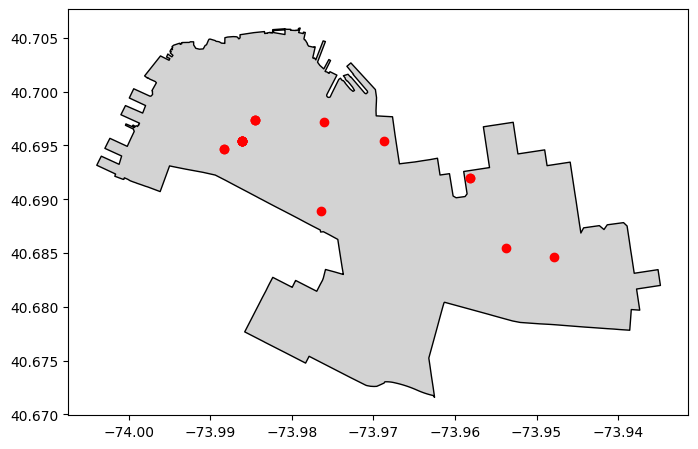

In [93]:
districts = geo.load_districts()
points = geo.load_school_locations()
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))


points = points[points.dbn.isin(df.dbn)]
districts[districts.district == 13].plot(ax=ax, color="lightgray", edgecolor="black", linewidth=1)
_ = points.plot(ax=ax, color="red")


In [120]:
district_map = districts.explore(
    column="district",  # use district for the category colors (aka choropleth)
    popup=False,  # turn things off
    tooltip=False,
    legend=False,
    tiles="CartoDB positron",  # use "CartoDB positron" tiles
    cmap="tab20b",  # use "tab20b" matplotlib colormap
    style_kwds={"color": "black"}  # use black outline
)
data = points.merge(df, on="dbn", how="inner")
data["school info"] = data.apply(ui.popup(["dbn", "school_name", "website", "url"]), axis=1)
# points["school info"]
data = data[["dbn", "school_name", "website", "url", "geometry", "school info"]]

data
# # points.explore(m=district_map, tooltip=False, legend=False, color="red", size=10, alpha=0.5)
# points = geo.load_school_locations()
# points[["dbn", "geometry"]].explore(m=district_map)
data.explore(m=district_map,popup="school info")


In [60]:
x = df.iloc[0]
import re  
p = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
for col in t:
    if p.match(x[col]):
        print(col, x[col])
        print(x[col]) 


url https://www.myschools.nyc/en/schools/high-school/15900
https://www.myschools.nyc/en/schools/high-school/15900


TypeError: cannot use a string pattern on a bytes-like object

In [39]:
df = pd.read_csv("~/Downloads/edx-advising.csv")
df.columns = [c.lower().strip() for c in df.columns]
df.course = df.course.apply(lambda x: f"""{x.split("*")[0]}-{x.split("*")[1]}""")
df = df[df.dept == "0858"]
df.au_email = df.au_email.str.lower()
df["first"] = df["first"].str.title()
df["last"] =  df["last"].str.title()
df = df[(df.major.isin(["EDT", "EDX"]))]
df = df[['term', 'au_email', 'email', 'first', 'last']]
df = df.groupby(['au_email', 'email', 'first', 'last']).term.min()
df = df.reset_index()
df = df[["first", "last", "au_email", "email", "term"]]
df.to_csv("~/Downloads/edx-contact.csv", index=False)

AttributeError: 'Series' object has no attribute 'major'

In [31]:


df.head()


AttributeError: 'Series' object has no attribute 'au_email'

In [5]:
reg = exams.load_regents()
len(reg.regents_exam.unique())

18

In [3]:
import numpy as np
import pandas as pd

# define function to calculate entropy for a row
def entropy(row):
    # get proportions and handle cases where proportion is 0
    p = row[row != 0] / 100

    # calculate entropy
    return -np.sum(p * np.log2(p))

# create example dataframe
df = pd.DataFrame({
    "asian_pct": [10, 20, 30],
    "white_pct": [30, 50, 70],
    "black_pct": [60, 30, 0]
})

# calculate entropy for each row and add to new column "entropy"
df["entropy"] = df.apply(entropy, axis=1)

print(df)

   asian_pct  white_pct  black_pct   entropy
0         10         30         60  1.295462
1         20         50         30  1.485475
2         30         70          0  0.881291


In [33]:
# load the data_urls from config for hs_admissions
data_urls = schools.config.urls["hs_admissions"].data_urls
# get a dataframe from the 2021 url
df = pd.read_csv(data_urls["2021"])
df.head()

school_dbn                                        school_name program_code  \
0     01M448       UNIVERSITY NEIGHBORHOOD HIGH SCHOOL (01M448)         M35C   
1     01M448       UNIVERSITY NEIGHBORHOOD HIGH SCHOOL (01M448)         M35C   
2     01M448       UNIVERSITY NEIGHBORHOOD HIGH SCHOOL (01M448)         M35C   
3     01M450                EAST SIDE COMMUNITY SCHOOL (01M450)         M58A   
4     01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...         M29A   

                         selection_criteria  
0  2018-19 ELA/Math State Test Scores - 20%  
1                2018-19 Final Grades - 40%  
2       2019-20 Marking Period Grades - 40%  
3               Essay/Video Response - 100%  
4  2018-19 ELA/Math State Test Scores - 20%

In [34]:
df[["criteria", "percent"]] = df.selection_criteria.str.split(" - ", expand=True)
df["percent"] = df.percent.str.replace("%", "").astype(float) / 100
df.drop("selection_criteria", axis=1, inplace=True)


In [35]:

list(df.criteria.unique())
# df.head()
vals = {
    '2018-19 ELA/Math State Test Scores': "7th grade ELA/Math Scores",
    '2018-19 Final Grades': "7th grade final grades",
    '2019-20 Marking Period Grades': "8th grade fall grades",
    'Essay/Video Response': "Essay/Video Response",
    'Humanities Response': "Humanities Response",
    'STEM Response': "STEM Response",
    'Video Response': "Video Response",
    'Interview': "Interview",
    'Online Admissions Activity': "Online Admissions Activity",
    'Essay': "Essay",
    'Interview/Online Form': "Interview/Online Form",
    'Artifact 1': "Artifact 1",
    'Artifact 2': "Artifact 2",
    'Entrance Assessment: Math': "Entrance Assessment: Math",
    'Written Exercise': "Written Exercise"
}
df.criteria = df.criteria.map(vals)


school_dbn                                        school_name program_code  \
0     01M448       UNIVERSITY NEIGHBORHOOD HIGH SCHOOL (01M448)         M35C   
1     01M448       UNIVERSITY NEIGHBORHOOD HIGH SCHOOL (01M448)         M35C   
2     01M448       UNIVERSITY NEIGHBORHOOD HIGH SCHOOL (01M448)         M35C   
3     01M450                EAST SIDE COMMUNITY SCHOOL (01M450)         M58A   
4     01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...         M29A   

                    criteria  percent  
0  7th grade ELA/Math Scores      0.2  
1     7th grade final grades      0.4  
2      8th grade fall grades      0.4  
3       Essay/Video Response      1.0  
4  7th grade ELA/Math Scores      0.2

In [36]:

df["admission year"] = 2021
df.head()

school_dbn                                        school_name program_code  \
0     01M448       UNIVERSITY NEIGHBORHOOD HIGH SCHOOL (01M448)         M35C   
1     01M448       UNIVERSITY NEIGHBORHOOD HIGH SCHOOL (01M448)         M35C   
2     01M448       UNIVERSITY NEIGHBORHOOD HIGH SCHOOL (01M448)         M35C   
3     01M450                EAST SIDE COMMUNITY SCHOOL (01M450)         M58A   
4     01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...         M29A   

                    criteria  percent  admission year  
0  7th grade ELA/Math Scores      0.2            2021  
1     7th grade final grades      0.4            2021  
2      8th grade fall grades      0.4            2021  
3       Essay/Video Response      1.0            2021  
4  7th grade ELA/Math Scores      0.2            2021

In [38]:
data = schools.load_hs_directory(2020)

In [46]:
cols = list(data.columns)
[c for c in cols if "admiss" in c.lower()]
data.admissionspriority12.unique()

array([nan, 'Priority to District 6 students or residents',
       'Priority to Brooklyn students or residents',
       'Open to New York City residents',
       'Priority to Bronx students or residents',
       'Priority to continuing 8th graders',
       'Priority to Staten Island students or residents',
       'Priority to Queens students or residents',
       'Priority to Manhattan students or residents',
       'Priority to students who live in the zoned area',
       'Priority to Manhattan students or residents who have lived in the United States two years or fewer and whose home language is Spanish',
       'Open to New York City residents whose home language is Chinese (Mandarin)',
       'Priority to students who reside in the geographical catchment area',
       'Priority to students living in the geographic zone',
       'Priority to Districts 13, 14, 15 and 16 students or residents',
       'Priority to students who live in the zoned area for up to 50% of the seats',
      

In [16]:
# 2021 DOE High School Directory
url = "https://data.cityofnewyork.us/resource/8b6c-7uty.csv?$limit=10000"
hs21 = pd.read_csv(url)


In [17]:
url = "https://data.cityofnewyork.us/resource/23z9-6uk9.csv?$limit=10000"
hs20 = pd.read_csv(url)

In [26]:
# hs21.columns & hs20.columns
len(hs21.columns.difference(hs20.columns))

116

In [26]:
from nycschools import schools
df = schools.load_school_demographics()
df.columns

Index(['dbn', 'beds', 'district', 'geo_district', 'boro', 'school_name',
       'short_name', 'ay', 'year', 'total_enrollment',
       'grade_3k_pk_half_day_full', 'grade_k', 'grade_1', 'grade_2', 'grade_3',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'female_n', 'female_pct', 'male_n',
       'male_pct', 'asian_n', 'asian_pct', 'black_n', 'black_pct',
       'hispanic_n', 'hispanic_pct', 'multi_racial_n', 'multi_racial_pct',
       'native_american_n', 'native_american_pct', 'white_n', 'white_pct',
       'missing_race_ethnicity_data_n', 'missing_race_ethnicity_data_pct',
       'swd_n', 'swd_pct', 'ell_n', 'ell_pct', 'poverty_n', 'poverty_pct',
       'eni_pct', 'clean_name', 'zip'],
      dtype='object')

In [ ]:

# Define the API endpoint URL
url = "https://data.cityofnewyork.us/api/catalog/v1?limit=10"

# Send a GET request to the API endpoint and get the JSON response
headers = {
    "X-App-Token": token
}

response = requests.get(url, headers=headers)
data = response.json()

results = data["results"]
len(results)

In [38]:
datasets = {result["metadata"]["domain"]: result for result in results}
datasets.keys()

dict_keys(['www.dallasopendata.com', 'data.ny.gov', 'data.ct.gov', 'data.cdc.gov', 'opendata.howardcountymd.gov', 'data.cityofchicago.org', 'data.nj.gov', 'data.wa.gov', 'data.cityofnewyork.us', 'data.nashville.gov', 'data.memphistn.gov', 'www.datos.gov.co', 'healthdata.gov', 'health.data.ny.gov', 'data.mo.gov', 'datahub.transportation.gov', 'data.montgomerycountymd.gov', 'data.fortworthtexas.gov', 'data.pa.gov', 'data.kingcounty.gov', 'data.lacity.org', 'data.colorado.gov', 'data.virginia.gov', 'data.calgary.ca', 'data.cambridgema.gov', 'data.providenceri.gov', 'data.sfgov.org', 'insights.cincinnati-oh.gov', 'data.pr.gov', 'data.delaware.gov', 'priv-data.ojp.usdoj.gov', 'datahub.usac.org', 'data.vermont.gov', 'data.bts.gov', 'datacatalog.cookcountyil.gov', 'data.cincinnati-oh.gov', 'data.oregon.gov', 'data.lacounty.gov', 'data.edd.ca.gov', 'data.energystar.gov', 'data.norfolk.gov', 'data.hawaii.gov', 'data.cityofgainesville.org', 'data.hartford.gov', 'internal.chattadata.org', 'intern

In [ ]:

# do a dict comprehension to add each item in results keyed by metadata.domain
datasets = {result["metadata"]["domain"]: result for result in results}


# Extract the intersecting keys from the results dictionary
keys = set(results[0].keys())
for result in results:
    keys &= set(result.keys())

# Create a list of dictionaries with only the intersecting keys
filtered_results = []
for result in results:
    filtered_result = {}
    for key in keys:
        filtered_result[key] = result[key]
    filtered_results.append(filtered_result)

# Create a DataFrame from the list of dictionaries
# df = pd.DataFrame(filtered_results)
# df.head()
datasets.keys()
len(results)

In [ ]:
import pandas as pd

# meta = "https://data.cityofnewyork.us/api/views/metadata/v1"
# meta = "https://data.cityofnewyork.us/api/catalog/v1.csv?ids=*"
# get a list of all of the data sets in cityofnewyork socrata
meta = "https://data.cityofnewyork.us/api/catalog/v1?domains=data.cityofnewyork.us"
df = pd.read_json(meta, lines=True)
meta.head()

In [2]:

{
    "doe_22": "https://infohub.nyced.org/docs/default-source/default-document-library/updated2023_avg_classsize_schl.xlsx",

}

url = "https://data.cityofnewyork.us/resource/sgr7-hhwp.csv?$limit=1000000"

# nyc = pd.read_csv(url)
# print(df.columns)
# df.grade_level.unique()
# df.head()

url = "https://infohub.nyced.org/docs/default-source/default-document-library/updated2023_avg_classsize_schl.xlsx"
xls = pd.read_excel(url, sheet_name=None)
# first sheet is k-8
k8 = xls["K-8 Avg"]
hs = xls["MS HS Avg"]
ptr = xls["PTR"]
k8.head()

/home/mxc/.virtualenvs/nycschools/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/mxc/.virtualenvs/nycschools/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/mxc/.virtualenvs/nycschools/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


DBN              School Name Grade Level Program Type  \
0  01M015  PS 015 ROBERTO CLEMENTE           K          G&T   
1  01M015  PS 015 ROBERTO CLEMENTE           K          ICT   
2  01M015  PS 015 ROBERTO CLEMENTE           1          G&T   
3  01M015  PS 015 ROBERTO CLEMENTE           1          ICT   
4  01M015  PS 015 ROBERTO CLEMENTE           2          G&T   

   Number of Students  Number of Classes  Average Class Size  \
0                  11                  1                11.0   
1                  25                  1                25.0   
2                  14                  1                14.0   
3                  17                  1                17.0   
4                   7                  1                 7.0   

  Minimum Class Size Maximum Class Size  
0                <15                <15  
1                 25                 25  
2                <15                <15  
3                 17                 17  
4                <15                <15

SHSAT
======

In [17]:
# show the intersecting columns
print(set(k8.columns) - set(hs.columns))
print(set(hs.columns) - set(k8.columns))
print(len(hs.columns) , len(k8.columns))

set()
{'Subject', 'Department'}
11 9


In [23]:
k8["Subject"] = "K8"
k8["Department"] = "K8"
df = pd.concat([k8, hs], axis=0).head()
df["ay"] = 2022
cols = {
    "DBN": "dbn",
    "School Name": "school_name",
    "Grade Level": "grade",
    "Program Type": "program_type",
    "Number of Students": "students_n",
    "Number of Classes": "classes_n",
    "Average Class Size": "avg_class_size",
    "Subject": "subject",
    "Department": "dpt",
    "Minimum Class Size": "min_class_size",
    "Maximum Class Size": "max_class_size"
}
df = df.rename(columns=cols)
# drop school_name
df = df.drop(columns=["school_name"])
df.head()
df.to_csv("/opt/nycschools/nyc_class_size.csv", index=False)

In [5]:
df = pd.read_csv("https://data.cityofnewyork.us/resource/43qn-d6r8.csv?$limit=1000000")
print(df.columns)
df

Index(['grade_level', 'program_type', 'department', 'subject',
       'number_of_students', 'number_of_classes', 'average_class_size'],
      dtype='object')


grade_level program_type      department                  subject  \
0      HS Core       Gen Ed         English            HS English 09   
1      HS Core       Gen Ed         English            HS English 10   
2      HS Core       Gen Ed         English            HS English 11   
3      HS Core       Gen Ed         English            HS English 12   
4      HS Core       Gen Ed         English         HS English Other   
..         ...          ...             ...                      ...   
95     MS Core           SC            Math            MS Math Other   
96     MS Core           SC         Science          MS Science Core   
97     MS Core           SC         Science         MS Science Other   
98     MS Core           SC  Social Studies   MS Social Studies Core   
99     MS Core           SC  Social Studies  MS Social Studies Other   

    number_of_students  number_of_classes  average_class_size  
0                48093               1897                25.4  
1                46274               1762                26.3  
2                45892               1780                25.8  
3                44382               1735                25.6  
4                75065               3458                21.7  
..                 ...                ...                 ...  
95                 598                 60                10.0  
96               10747               1095                 9.8  
97                 210                 23                 9.1  
98               10663               1079                 9.9  
99                 122                 13                 9.4  

[100 rows x 7 columns]

In [2]:
from nycschools import config, geo, dataloader, schools


a = schools.load_school_demographics()
b = geo.get_locations()
c = b.merge(a, on="dbn", how="inner")
# c.explore()
# b.open_date.astype("datetime64[ns]").dt.year
b.fiscal_year


0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
2185    2020
2186    2020
2187    2020
2188    2020
2189    2020
Name: fiscal_year, Length: 2190, dtype: int64